This is the julia version of the notebook that will illustrate all the calculations in the directed search reading.  You can read the details of the basic model at [https://montoya.econ.ubc.ca/Econ600/directed_search.pdf](https://montoya.econ.ubc.ca/Econ600/directed_search.pdf).

The first is the basic equation is the condition that makes each worker indifferent between his or her two strategies.
$$\pi w_1 /2+(1-\pi)w_1=\pi w_2+(1-\pi)w_2 /2$$
The solution to this equation makes both workers indfferent about whether they apply to firm 1 or firm 2. The code for the solution in sagemath follows. If the solution isn't there, put your cursor in the cell and press ctl-enter.

In [1]:
using SymPy
w_1, w_2 = symbols("w_1, w_2",real=true,positive=true)
pi = symbols("pi")

π

In [2]:
left = pi*(w_1/2)+(1-pi)w_1

π⋅w₁             
──── + w₁⋅(1 - π)
 2               

In [3]:
right = pi*w_2+(1-pi)*w_2/2

       w₂⋅(1 - π)
π⋅w₂ + ──────────
           2     

Having done all this setup, we can start actual calculations.  The first thing is to do a naive solve to find a formula.

In [4]:
prob_simp = solve(left-right,pi)[1]

2⋅w₁ - w₂
─────────
 w₁ + w₂ 

We'll need this formula for finding best replies.  However, since we want to solve the whole game, which includes finding the wages $w_1$ and $w_2$, the formula above has a problem, it might give values that are negative or larger than 1 for some pairs of wages, and at this point we have no way to tell what wages are.  

If you recall the basic game theory, when the solution to this equation is negative, it means that applying to the firm offering wage $w_1$  is a dominated strategy, so we want the formula in that case to give $0$ instead.  Similarly, if the formula above gives a number larger than 1, it means applying to firm 1 dominates applying to firm 2.  We can accomplish this with the following trick.

In [5]:
prob = max(min(solve(left-right,pi)[1],1),0)

Max(0, Min(1, (2*w_1 - w_2)/(w_1 + w_2)))

Assuming that firm 1 has revenue $y_1$ whenever it hires an employee, its profits will be $y_1-w_1$.  Expected profits are then the probability that at least one worker applies multiplied by $y_1-w_1$  That is 
$$
(y_1-w_1)(1-(1-\pi)^2)
$$
In code:

In [6]:
y_1,y_2 = symbols("y_1,y_2")
profit = (1-(1-prob)^2)*(y_1-w_1)

⎛                                                   2⎞           
⎝1 - (1 - Max(0, Min(1, (2*w_1 - w_2)/(w_1 + w_2)))) ⎠⋅(-w₁ + y₁)

Now by plotting the profit function, we can get a really good idea what the problem is about.

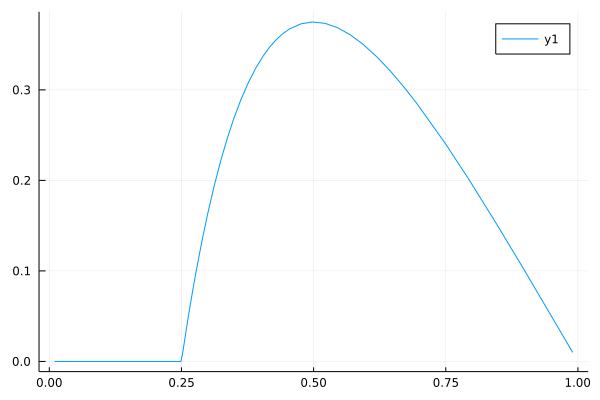

In [7]:
using Plots
plot(profit(w_2 => 1/2,y_1 => 1),.01,.99)

This is a very nicely behaved profit function with a single peak, at least when $w_2 = \frac{1}{2}$.  However, notice that it isn't differentiable.  To the extent that differentriating a non differentiable function works, you will still end up with a continuum of solutions, including all the wages below $.25$ as solutions to the first order condition. You can experiment with this plot by re-assigning values to $w_2$  and $y_1$.  Doing so will give you a better feel for how the profit function behaves.

We are looking for the best profit. The picture says that this is attained well within the region where the profit function is differentiable. So lets reconstruct the profit function so that it uses the formula for $\pi$ that is free of the $\max$ and $\min$ operators.

In [8]:
profit_simp = (1-(1-prob_simp)^2)*(y_1-w_1)
dprofit = diff(profit_simp, w_1)

               2                                                             
⎛    2⋅w₁ - w₂⎞    ⎛    2⋅w₁ - w₂⎞            ⎛     4      2⋅(2⋅w₁ - w₂)⎞    
⎜1 - ─────────⎟  - ⎜1 - ─────────⎟⋅(-w₁ + y₁)⋅⎜- ─────── + ─────────────⎟ - 1
⎝     w₁ + w₂ ⎠    ⎝     w₁ + w₂ ⎠            ⎜  w₁ + w₂              2 ⎟    
                                              ⎝              (w₁ + w₂)  ⎠    

Now we can find another famous idea in game theory - the best reply function:

In [9]:
BR = solve(dprofit,w_1)[1]

w₂⋅(w₂ + 4⋅y₁)
──────────────
 5⋅w₂ + 2⋅y₁  

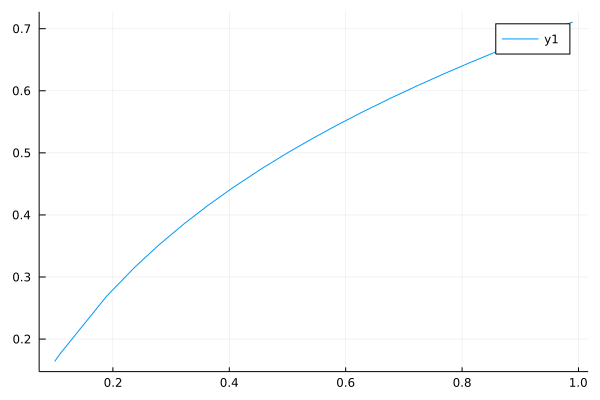

In [10]:
plot(BR(y_1 => 1),0.1,.99)


The best wage for firm 1 to offer is an increasing function of the wage that firm 2 sets.  We typically describe the equilibrium by looking at the point where the two best reply functions intersect. A couple of observations. First, firm 2 is indentical to firm 1, so it must have the same best reply function.  Second, we typically draw the intersection by using the same best reply function but drawing its inverse (changing the axis).   We can do this by drawing the plot again using the same best reply function `BR` but measuring $w_2$ on the vertical axis instead of $w_1$.  The way to do this is to specify the variable that should be on the vertical axis (note `w_2` in the command, then using `!` after `plot` in the command to overlay the picture on the last one.

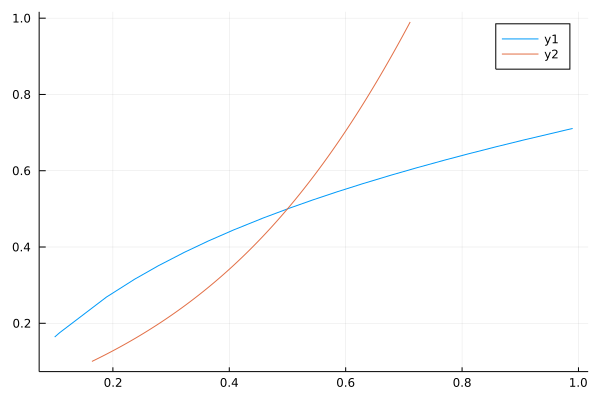

In [11]:
plot!(BR(y_1 => 1),w_2,0.1,.99)

Notice the two lines intersect nicely at $\frac{1}{2}$, in other words each firm should set the wage $\frac{1}{2}$ in equilibrium. 

Since the firms are identical, we have good reason to believe they will both set the same wage in equilibrium.  Whatever that wage is, the best reply to that wage should be equal to that wage.  So we can try solving.

In [12]:
solve(w_2-BR(y_1 => 1))

1-element Vector{Sym}:
 1/2

Can you explain why the solution $w_1=w_2=0$ is not an equilibrium?

# Different Firms

It isn't really much harder to make the firms different when you have the symbolic software.  This might also give you a better sense of how the equilibrium wages are being determined.  The condition we want is that both wages are best replies to each other.  

To accomplish this, we can write the profit and best reply function for firm 2 - we need to do this now because firm 1 and 2 are different.  Since for a pair of wages $w_1,w_2$, `prob_simp` gives the probability that any worker will apply to firm 1, we just use `1-prob_simp` as the probability each worker applies to firm 2.  This gives the following computational stuff

In [13]:
profit_simp2 = (1-(prob_simp)^2)*(y_2-w_2)
dprofit2 = diff(profit_simp2, w_2)

           ⎛                              2⎞                  2
           ⎜  -4⋅w₁ + 2⋅w₂   2⋅(2⋅w₁ - w₂) ⎟       (2⋅w₁ - w₂) 
(-w₂ + y₂)⋅⎜- ──────────── + ──────────────⎟ - 1 + ────────────
           ⎜            2               3  ⎟                 2 
           ⎝   (w₁ + w₂)       (w₁ + w₂)   ⎠        (w₁ + w₂)  

In [14]:
BR2 = solve(dprofit2,w_2)[1]

w₁⋅(w₁ + 4⋅y₂)
──────────────
 5⋅w₁ + 2⋅y₂  

In [15]:
BR

w₂⋅(w₂ + 4⋅y₁)
──────────────
 5⋅w₂ + 2⋅y₁  

Finally, since the `solve` command given in the previous section is looking for a symbolic solve, we can now convert everything to real numbers to solve for the fixed point.

In [16]:
sympy.nsolve((w_1-BR(y_1 => .8),w_2-BR2(y_2 => 1)),(w_1,w_2),(.5,.5))

2×1 Matrix{Sym}:
 0.431733526043031
 0.460081956966271